In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

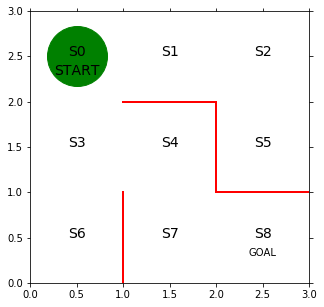

In [2]:
# マップ作成
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 壁を書く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を書く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', size=14, ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)
plt.savefig('fig1.png', bbox_inches='tight')

In [3]:
# 方策のパラメータを設定
theta_0 = np.array([
    [np.nan, 1, 1, np.nan], # s0
    [np.nan, 1, np.nan, 1], # s1
    [np.nan, np.nan, 1, 1], # s2
    [1, 1, 1, np.nan], # s3
    [np.nan, np.nan, 1, 1], # s4
    [1, np.nan, np.nan, np.nan], #s5
    [1, np.nan, np.nan, np.nan], # s6
    [1, 1, np.nan, np.nan] #s7
])

In [7]:
a, b = theta_0.shape
Q = np.random.rand(a, b) + theta_0 * 0.1

In [12]:
def get_action(s, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == 'up':
        action = 0
    elif next_direction == 'right':
        action = 1
    elif next_direction == 'down':
        action = 2
    elif next_direction == 'left':
        action = 3
    
    return action

In [13]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
        
    return s_next

In [11]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while True:
        a = a_next
        s_a_history[-1][1] = a
        s_next = get_s_next(s, a, Q, epsilon, pi)
        s_a_history.append([s_next, np.nan])
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
    return s_a_history, Q

In [8]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    
    return Q

In [9]:
eta = 0.1 # 学習率
gamma = 0.9 # 時間割引率
epsilon = 0.5
v = np.nanmax(Q, axis=1)

is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

In [14]:
while is_continue:
    print('Episode{}'.format(episode))
    epsilon = epsilon / 2
    s_a_history, Q = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    print('迷路を解くのにかかったステップ数は{}です'.format(len(s_a_history)))
    episode = episode + 1
    if episode > 100:
        break

Episode1
1.1931868163981523
迷路を解くのにかかったステップ数は55です
Episode2
0.5844421548617612
迷路を解くのにかかったステップ数は89です
Episode3
0.05490010344960672
迷路を解くのにかかったステップ数は9です
Episode4
0.07259569376751174
迷路を解くのにかかったステップ数は13です
Episode5
0.09273010881699995
迷路を解くのにかかったステップ数は13です
Episode6
0.04809485724851459
迷路を解くのにかかったステップ数は9です
Episode7
0.04346051907850901
迷路を解くのにかかったステップ数は7です
Episode8
0.0402873658839652
迷路を解くのにかかったステップ数は9です
Episode9
0.03790997588186673
迷路を解くのにかかったステップ数は7です
Episode10
0.027821247670652527
迷路を解くのにかかったステップ数は5です
Episode11
0.03655068667177386
迷路を解くのにかかったステップ数は7です
Episode12
0.027348307013047357
迷路を解くのにかかったステップ数は5です
Episode13
0.03278124027584195
迷路を解くのにかかったステップ数は7です
Episode14
0.02570916186165606
迷路を解くのにかかったステップ数は5です
Episode15
0.02442379286970775
迷路を解くのにかかったステップ数は5です
Episode16
0.023664549049847272
迷路を解くのにかかったステップ数は5です
Episode17
0.023402566974402683
迷路を解くのにかかったステップ数は5です
Episode18
0.023094660566404523
迷路を解くのにかかったステップ数は5です
Episode19
0.022743238304007152
迷路を解くのにかかったステップ数は5です
Episode20
0.022351182207452802
迷路

In [18]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm
%matplotlib notebook

In [16]:
def init():
    line.set_data([], [])
    return (line,)

In [22]:
def animate(i):
    line, = ax.plot([0.5], [2.5], marker='s', color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker='s', color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker='s', color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker='s', color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker='s', color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker='s', color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker='s', color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker='s', color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker='s', color=cm.jet(1.0), markersize=85)
    
    return (line,)

In [24]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)
# HTML(anim.to_jshtml())
anim.save('q-learning1.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
